In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [2]:
data = pd.read_csv('data/shuttle_data.csv')
data.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


## Exploratory Data Analysis

In [3]:
data.shape

(8518, 8)

### Check Duplicate values

In [4]:
duplicate_rows = data[data.duplicated()]

### Check Null values

In [5]:
data.isna().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [6]:
data.dropna(subset=['Review text'], inplace=True)

In [7]:
## Check the shape of the dataset
data.shape

(8510, 8)

### View some review text

In [8]:
data.loc[0, 'Review text']

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [9]:
data.loc[1, 'Review text']

"They didn't supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest....  Sad to hear this.READ MORE"

In [10]:
data.loc[2, 'Review text']

"Worst product. Damaged shuttlecocks packed in new box. It's not a original yonex product. Don't buy.flipkart platform is chosen to fraud the buyers.READ MORE"

* **Here, we can see that in the review, 'READ MORE' is present. It seems the data is not properly scrapped.**

<AxesSubplot:xlabel='Ratings', ylabel='count'>

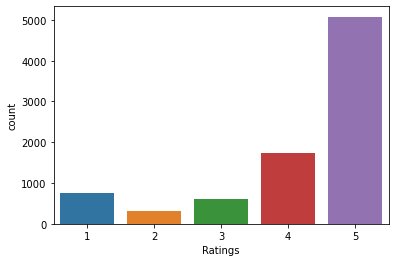

In [11]:
## Check the distribution of Ratings
sns.countplot(x='Ratings', data=data)

In [12]:
# Distribution on target variable looks non-uniform

data['Ratings'].value_counts(normalize=True)

5    0.596827
4    0.204935
1    0.090012
3    0.072268
2    0.035958
Name: Ratings, dtype: float64

### Under-Sampling Techniques
#### Advantage           
* It can help imporve run time and storage problems by reducing the number of training data samples when the training dataset is huge.

#### Disadvantage         
* It can discard potentially usefull information which could be important for building rule classifiers.             

### Up-Sampling Techinques
#### Advantage                   
* Unlike under-sampling, this method leads to no information loss.              
* Outperform under sampling                 

#### Disadvantage             
* It increase the likelihood of overfitting since it replicates the minority class events.  

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8510 entries, 0 to 8509
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8510 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 856.4+ KB


##### Here, we can see that the Review Text is of object type. It contains numbers or emojis, which is why its type is object. Therefore, we can convert it to a string datatype.

In [14]:
data['Review text'] = data['Review text'].astype(str)

### Visualize the text with a word cloud to see which words have a higher frequency.

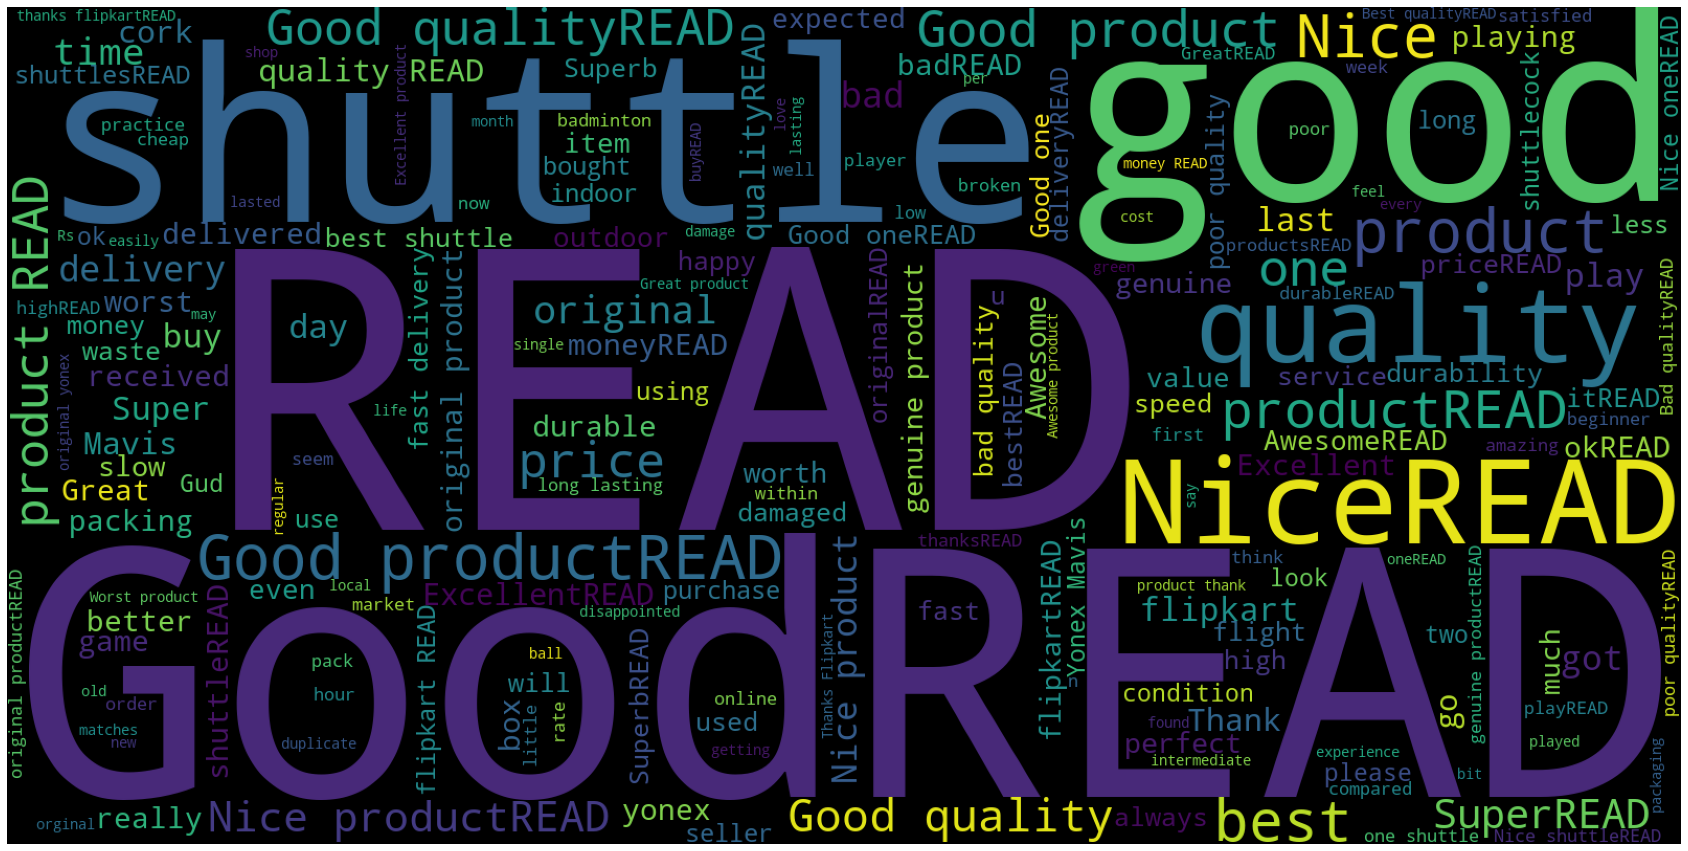

In [15]:
# Visuallizing an overall Word Cloud from the given data

from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data['Review text']))


import matplotlib.pyplot as plt

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

**Here, we can observe that the most frequent text values are 'READ' and 'GOOD.' This is because most of the reviews are positive. However, the reviews are not proper; many contain 'READ MORE.' Consequently, 'Read' and 'Good' are the frequent values present in the dataset.**

## Identify Input and Output

In [16]:
X = data[['Review text']] # the column text contains textual data to extract features from
y = data['Ratings'] # this is the column we are learning to predict.

print(X.shape, y.shape)

(8510, 1) (8510,)


## Split the data into train and test

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y ,random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6382, 1) (6382,)
(2128, 1) (2128,)


In [18]:
X_train.head()

,Review text
210,Yonex Mavis 350 is not a pure item. shuttle's ...
5900,it's top&bottom cabs are very light weight!why...
295,Very worst productREAD MORE
2221,The shuttle are good.... If u play normally it...
4270,Cheaper than market and they are originalREAD ...


### Data Prepration - Text Preprocessing

In [19]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [20]:
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [22]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

#### Define a function to remove redundant text and clean the text.

In [23]:
import string
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)

    # This text contains a lot of READ MORE. So replace this values
    sentence = sentence.replace("READ MORE", " ")

    # Remove punctuation and numbers.
    sentence = "".join([char for char in sentence if char not in string.punctuation and not char.isdigit()])

    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()

    # remove stop words
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]

    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

    return pd.Series([" ".join(clean_tokens)])

In [24]:
from tqdm import tqdm, tqdm_notebook

In [25]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

### Let's extract the clean reviews for both x_train and x_test

In [26]:
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`

X_train_clean = X_train['Review text'].progress_apply(lambda x: preprocess(x,'lemma'))

## X_train.head
X_train_clean.head()

100%|█████████████████████████████████████████████████████████████████████████████| 6382/6382 [00:46<00:00, 137.95it/s]


,0
210,yonex mavis pure item shuttle old
5900,top bottom cab light weight original
295,worst product
2221,shuttle good u play normally last week since m...
4270,cheaper market original


In [28]:
## View some text of clean review text
X_train_clean.loc[1]

0    supplied yonex mavis outside cover yonex ad in...
Name: 1, dtype: object

In [30]:
# ! pip install imbalanced-learn
from imblearn.over_sampling import ADASYN,SMOTE

### Preprocessing the Test Data

In [31]:
X_test.head()

,Review text
3691,Not badREAD MORE
1634,NiceREAD MORE
3663,NiceREAD MORE
7137,It really goodREAD MORE
4917,bad productREAD MORE


In [32]:
X_test_clean = X_test['Review text'].progress_apply(lambda x: preprocess(x, 'lemma'))
X_test_clean.head()

100%|██████████████████████████████████████████████████████████████████████████████| 2128/2128 [00:24<00:00, 85.12it/s]


,0
3691,bad
1634,nice
3663,nice
7137,really good
4917,bad product


In [33]:
X_test_clean.loc[0]

0    nice product good quality price rising bad sig...
Name: 0, dtype: object

### Create the model and trained the model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib
from joblib import Memory
import gensim

In [35]:
# ! pip install --upgrade gensim
print(gensim.__version__)

4.1.2


### Pretrained GloVe for Sentence Vector

In [36]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [37]:
wv = api.load('glove-twitter-50')

In [38]:
# Total number of vocabulary words in pretrained model
len(wv.index_to_key)

1193514

#### Define a class in which GloveVectorizer are initialized.

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
from gensim.models import KeyedVectors
from sklearn.preprocessing import FunctionTransformer

class GloVeVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, model=None):
        self.model = model

    def fit(self, X, y=None):
        # No fitting necessary for pre-trained embeddings
        return self

    def transform(self, X):
        return np.vstack([self.document_vector(doc) for doc in tqdm(X)])

    def document_vector(self, doc):
        """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
        # Filter out-of-vocabulary words
        vocab_tokens = [word for word in doc if word in self.model]

        if not vocab_tokens:
            # If there are no tokens in the vocabulary, return a zero vector
            return np.zeros(self.model.vector_size)

        # Compute the mean vector of the tokens
        return np.mean(self.model[vocab_tokens], axis=0)

## Creating an Optimal Workflow

Pipeline allows you to sequentially apply a list of transformers to preprocess the data and, if desired, conclude the sequence with a final predictor for predictive modeling.

## Caching to optimize the runtime
Caching is a technique used in software engineering to improve performance by storing frequently accessed or computed data in a temporary storage location, known as a cache. The purpose of caching is to reduce the time and resources required to access or compute the same data repeatedly.

We can create the **Memory** object to cache the intermediate results of `vectorization`.

This will avoid redundant computations of vectorization during the grid search, thereby optimizing the runtime. Adjust the cachedir parameter as needed to specify the location for caching the results.


As a software engineer, besides caching, you can employ several techniques to improve the time complexity of your code.
Implement **memoization** to store the results of expensive function calls and reuse them when the same inputs occur again. This is particularly useful for dynamic programming problems.

## Putting it all together: Implementing various Algorithms to find the Best Model

### Auto Logging All Experiment Runs using MLFlow

In [ ]:
import mlflow

mlflow.set_experiment("flipcart_review_sentiment_prediction")

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define a dictionary of pipelines
pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', MultinomialNB())
    ],memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', DecisionTreeClassifier())
    ],memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', LogisticRegression())
    ],memory=memory),
    'random_forest': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier())
    ],memory=memory),
    'svc': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', SVC())
    ],memory=memory),
    'knn': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', KNN())
    ],memory=memory),
    'xgboost': Pipeline([
        ('vectorization',TfidfVectorizer()),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', XGBClassifier())
    ],memory=memory),
    'lightgbm': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', LGBMClassifier())
    ]),
    'catboost': Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', CatBoostClassifier())
    ])
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes':[
        {
            'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
            'classifier__alpha': [0.1, 0.5, 1.0]
        }
    ],
    'decision_tree': [
        {
        'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
        'classifier__max_depth': [None, 3, 5, 10],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': [None, 'sqrt', 'log2']
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l2']
        },
        {
            'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l1'],
            'classifier__solver': ['liblinear']
        },
        {
            'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga']
        }
    ],
    'random_forest':[
         {
        'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
        'classifier__n_estimators': [50, 100, 200, 300],
        'classifier__max_depth': [None, 3, 5, 10],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': ['auto', 'sqrt', 'log2']
        # 'vectorization__max_features': [1000, 1500, 2000, 5000],
         }
    ],
   'svc': [
        {
            'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
            'classifier__kernel' : ['rbf'],
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        },
        {
            'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
            'classifier__kernel' : ['poly'],
            'classifier__degree' : [2, 3, 4, 5],
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        },
        {
            'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
            'classifier__kernel' : ['linear'],
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }
    ],
    'knn': [
        {
        'vectorization': [TfidfVectorizer(),GloVeVectorizer(model=wv)],
        # 'vectorization__max_features': [1000, 1500, 2000, 5000],
        'classifier__n_neighbors': [i for i in range(3, 21, 2)],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__p': [1, 2, 3]
        }
    ],
    'xgboost': [
        {
        'vectorization': [TfidfVectorizer(), GloVeVectorizer(model=wv)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.05, 0.1, 0.5],
        'classifier__subsample': [0.8, 0.9, 1.0],
        'classifier__colsample_bytree': [0.8, 0.9, 1.0],
        'classifier__reg_alpha': [0.1, 0.5, 1.0],
        'classifier__reg_lambda': [0.1, 0.5, 1.0]
        }
    ],
    'lightgbm': [
            {
        'vectorization': [TfidfVectorizer(), GloVeVectorizer(model=wv)],
        'classifier__num_leaves': [20, 30, 40],
        'classifier__n_estimators': [50, 100, 300],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__min_child_samples': [10, 20],
        'classifier__subsample': [0.8, 0.9, 1.0],
        'classifier__colsample_bytree': [0.8, 0.9, 1.0],
        'classifier__reg_alpha': [0.01, 0.1]
        }
    ], 
    'catboost': [
            {
        'vectorization': [TfidfVectorizer(), GloVeVectorizer(model=wv)],
        'classifier__n_estimators': [50, 100, 300],
        'classifier__depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__l2_leaf_reg': [1, 3, 5],
        'classifier__random_strength': [0.1, 0.5],
        'classifier__bagging_temperature': [0.1, 0.5]
    }
    ]
}

In [ ]:
# mlflow.end_run()
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10,'\n')
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1_weighted',
                               return_train_score=True,
                               verbose=2
                              )

    mlflow.sklearn.autolog(max_tuning_runs=None)
    
    with mlflow.start_run() as run:
        %time grid_search.fit(X_train_clean, y_train)
        
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test_clean, y_test))
    
    best_models[algo] = grid_search.best_estimator_
    print()


In [ ]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

In [ ]:
## saved all the trained model in best_models folder
import os
from sklearn import metrics
for name, model in best_models.items():
    print("*"*10, name, "*"*10)

    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')

    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred, average='macro'))

    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")